# Decision Trees

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

## Terms

**Instances** - set of inputs - vectors of attributes of what ever your input space is

**Concept** - function that maps inputs to outputs
* maps objects in the world into sets that they belong to 

**Target Concept** - the answer (the thing we are trying to find) 

**Hypothesis Class** - the set of all concepts (function classes) that we are willing to think about
* if its all possible functions? it becomes very hard to figure out which function is the best given finite data. 

**Candidate** - *concept* that we think is the *target concept*

**Sample** - training set
* set of all our inputs paired with a label (correct output)

**Testing Set** 
* Should not be the same as the training set. Used to prove that the model is able to generalize.

## ID3 Algorithm

**LOOK AT THE HAND OUT**

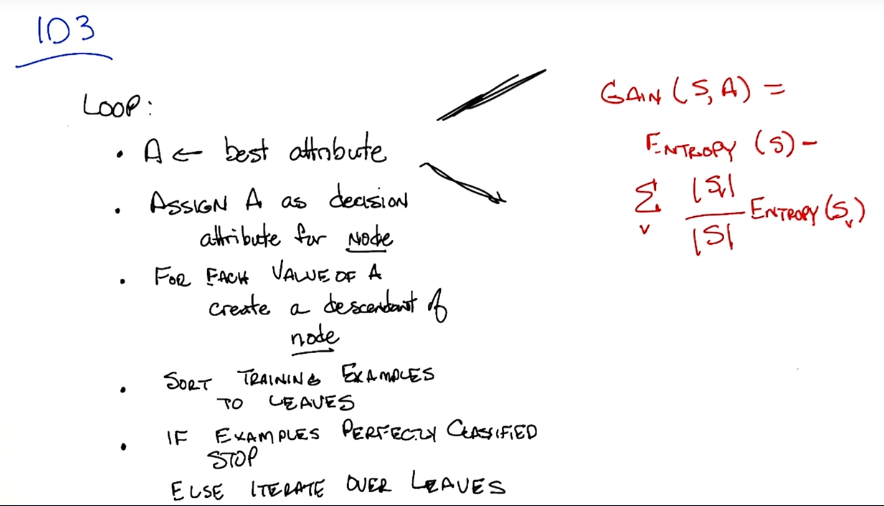

What is meant but best attribute?
$$\text{Gain}(S,A) = \text{Entropy}(S) - \sum_v \frac{|S_v|}{|S|}*Entropy(S_v)$$

* $S$ - collection of training examples that we are looking at 
* $A$ - particular attribute 
* $V$ - a specific attribute
* The second term can be interpreted as the average entropy over each set of example with a particualre value 


Entropy is a measure of randomness. 

$$\text{Entropy} = - \sum_v p(v) \log p(v)$$

*Example:*
* A fair coin flip. Will have an Entropy value of 1 because the results of the that coin flip will be perfectly random.

* Flipping a coin with heads on the same side. We know before hand what the out come will be. No randomness i present in the result, the entropy is 0

Take away: 
* prefer splits maximise over the entropy $Gain(S,A)$

## ID3 Bias

**Restrictive Bias:**

The hypothesis set $H$ we care about. In this case we are only considering all possible decision trees. 

**Preference Bias**

What kind of hypothesis $h$ from a from the hypothesis set $H$ we prefer.

**Inductive Bias**

The ID3 algorithm would prefer hypothesis (produce trees) that:
* have good splits at the top
* correct over incorrect splits
* shorter trees - as a result of doing good splits at the top

## Final Notes

### Attributes

So far we've had descrete inputs and outputs. What about continues attributes?
We can consider them by using ranges.

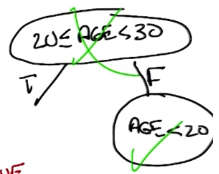

**Note:** With continues attributes, we can have repeated attributes along a path.

### When do we stop? (& pruning)

**When do we stop?**
* everything fits
* no more attributes to use
* no overfitting

Recall that the whole goal is for the model to generalsie. We don't want the tree to classify everything correctly as this would just be overfitting.

Ways to deal with overfitting, grow the tree and while that happens check against a cross validation set and stop growing the tree if a satisfactory error is obtained. 

**But** note that the algorithm operates on a depth first search principle,so we could stop the algorithm before we actually build the best tree for the validation set. This can be rectified by implemening it as a breadth first search implemenetation. 

An even more elegant solution would be to construct the tree as we normally would (untill it fits everything) and then we prune the tree using the cross validation set. This is called **Prunning**.

*A note on prunning:* since we are removing branches we wont have a clear idea of what to pick for the layer above the prune. The solution is to do a vote with the leaves to determine what the parent node should be.

### Regression?

What is the splitting criteria?
* We can look at the variance

What do we do with the leaves?
* Output: Average, local linear fit

# More Decision Trees - Continues Data

Allow you to ask multiple linear questions in a row.


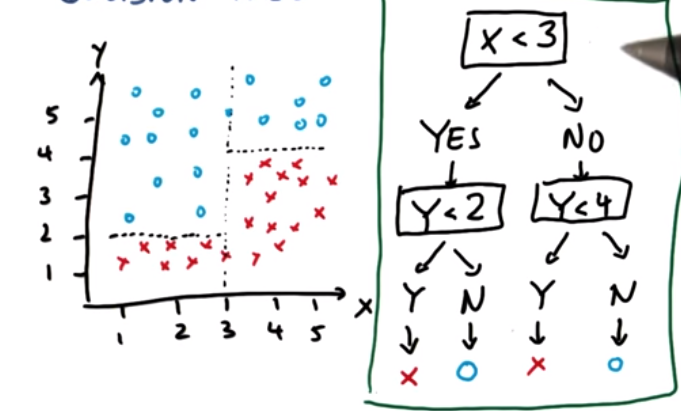

## Coding a Decision Tree

In [6]:
from sklearn import tree

def classify(features_train, labels_train):
    
    ### your code goes here--should return a trained decision tree classifer
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(features_train,labels_train)
    
    
    return clf

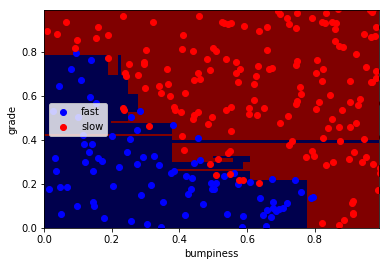

In [12]:
#!/usr/bin/python

""" lecture and example code for decision tree unit """

import sys
#from class_vis import prettyPicture, output_image
#from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
#from classifyDT import classify

features_train, labels_train, features_test, labels_test = makeTerrainData()

### the classify() function in classifyDT is where the magic
### happens--fill in this function in the file 'classifyDT.py'!
clf = classify(features_train, labels_train)



#### grader code, do not modify below this line
%matplotlib inline
prettyPicture(clf, features_test, labels_test)
#output_image("test.png", "png", open("test.png", "rb").read())


Notice the long slices, these are signes of overfitting. 

**Accuracy**

In [15]:
from sklearn import metrics

predictions = clf.predict(features_test)

metrics.accuracy_score(labels_test,predictions)

0.90800000000000003

**Try increase the models performance**

Looking at the arguments for `sklearn.tree.DecisionTreeClassifier` we see `min_sample_split=2`

min_sample_split=2 The minimum number of samples required to split an internal node.

In [20]:
from sklearn import metrics

clf = tree.DecisionTreeClassifier(min_samples_split = 50)
clf = clf.fit(features_train,labels_train)

predictions = clf.predict(features_test)

metrics.accuracy_score(labels_test,predictions)

0.91200000000000003

Our accuracy increased by around 1%!

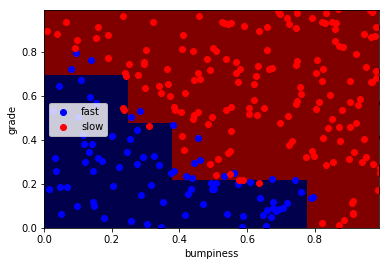

In [21]:
%matplotlib inline
prettyPicture(clf, features_test, labels_test)

Notice how a min_sample_split=50 gives us a better accuracy and how it changes the decision boudanry.  

## Entorpy

**Entorpy:** Controls how much a DT decides where to split the data

*Definition:* measure of *impurity* in a bunch of examples 


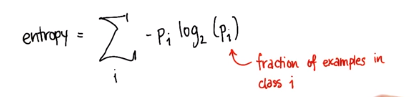

**Example:**

Can the car travel fast or slow?

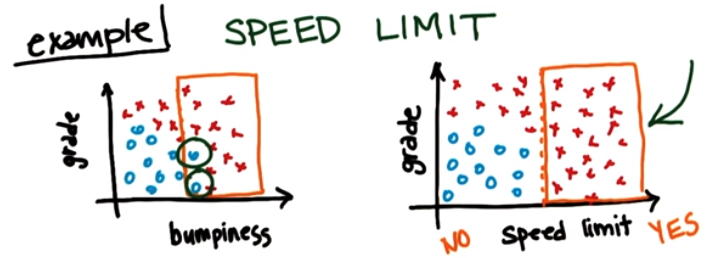

The graph on the right has a split of only x's while the split in the diagram on the left has some o's mixed in. So the split on the right can be considered more pure.

i.e. find subsets of data that are as pure as possible 

### Intuition

You could think of entropy as the opposite of purity.

* All examples are same class $\rightarrow$ Entropy = 0
* Examples are evenly split between classes $\rightarrow$ Entropy = 1 (Max value)

**Example:**

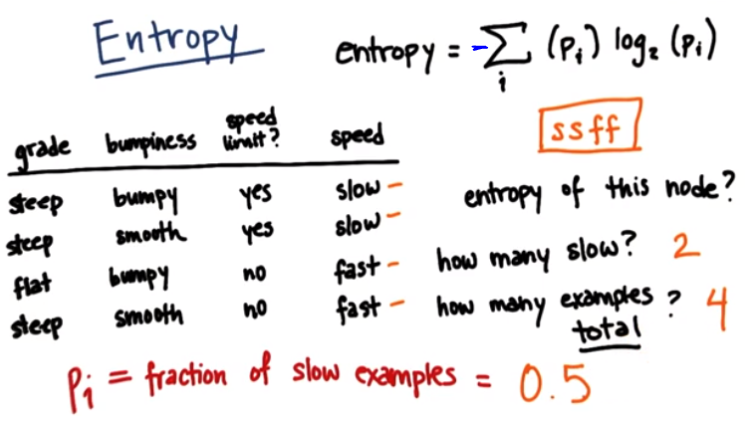

Following as was done above:

$P_\text{slow} = 0.5$

$P_\text{fast} = 0.5$

$\text{Entropy} = 1.0$

## Information Gain

**Formula**
$$\text{information gain} = \text{entropy(parent)} - [\text{weighted average}]*\text{entropy(child)}$$

Where:
* parent - some space of data
* children - refers to the hypothetical sub-sets (children) if a split were to occur on a parent

The decision tree algorithm will maximize the information gain.

** Example:**

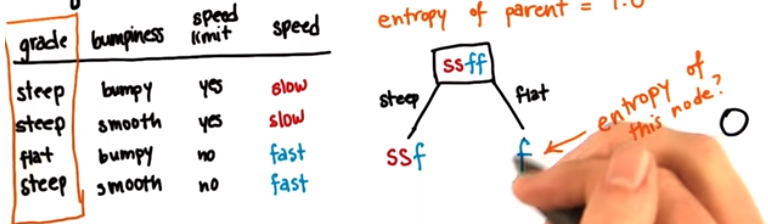

The entropy of this node is 0 as all the observations are of the same class.

**For the steep split:**

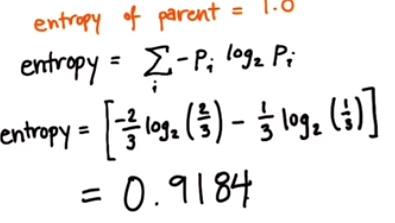

What is the information gain?

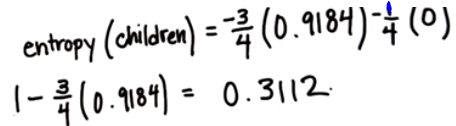

**Another example:**
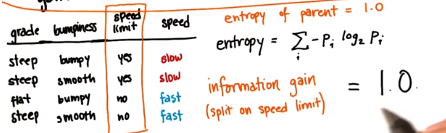

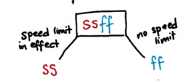

**NOTE for SKLear**
In SkLearn, splitting criteria is tunable. The default is the gini-index. They also support entropy -> but you will have to specify it.

Want an algorithm that generalises the data but still fits the data. 

## Strengths and Weaknesses

Strength:
* Easy to use
* Easy to graphically understand
* You can build bigger classifiers using somthing called ensamble methods 

Weakness:
* Prone to over fitting -> if you have lots of features and a complicated decicion tree
 * Stop the growth of the tree at an apporiate level to stop overfitting.  

# Dependencies

In [10]:
#class_vis.py
import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    #plt.savefig("test.png")
    plt.show()
    
import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end

In [2]:
# prep_terrain_data.py
#!/usr/bin/python
import random

def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data